In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 MOET CHANDON BELGIAN GRAND PRIX 2025
The Belgian Grand Prix (French: Grand Prix de Belgique; Dutch: Grote Prijs van België; German: Großer Preis von Belgien) is a motor racing event which forms part of the Formula One World Championship. The first national race of Belgium was held in 1925 at the Spa region's race course, an area of the country that had been associated with motor sport since the very early years of racing. To accommodate Grand Prix motor racing, the Circuit de Spa-Francorchamps race course was built in 1921 but until 1924 it was used only for motorcycle racing. After the 1923 success of the new 24 hours of Le Mans in France, the Spa 24 Hours, a similar 24-hour endurance race, was run at the Spa track.

Since its inception, Spa-Francorchamps has been known for its unpredictable weather. At one stage in its history it had rained at the Belgian Grand Prix for twenty years in a row. Frequently drivers confront a part of the course that is clear and bright while another stretch is rainy and slippery.

The Belgian Grand Prix was designated the European Grand Prix six times between 1925 and 1973, when this title was an honorary designation given each year to one Grand Prix race in Europe. It is one of the most popular races on the Formula One calendar, due to the scenic and historical Spa-Francorchamps circuit being a favourite of drivers and fans.
Source: Wikipedia
Analyzed by Franccy del Piero Sambrano Ganoza

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='BEL')

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1265,9929,Spa-Francorchamps,2025-07-25T10:30:00+00:00,2025-07-25T11:30:00+00:00,Practice,Practice 1,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025
1,1265,9930,Spa-Francorchamps,2025-07-25T14:30:00+00:00,2025-07-25T15:14:00+00:00,Qualifying,Sprint Qualifying,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025


## Free Practice 1
### Obtain setup

In [23]:
practice = libraryDataF1.obtain_information('laps',session_key=9929)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9929)
drivers = libraryDataF1.obtain_information('drivers',session_key=9929)

In [24]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Red Bull is the fastest on the straights being remarkable in sector 1 and 3. Sauber and Mercedes did the same strategy.

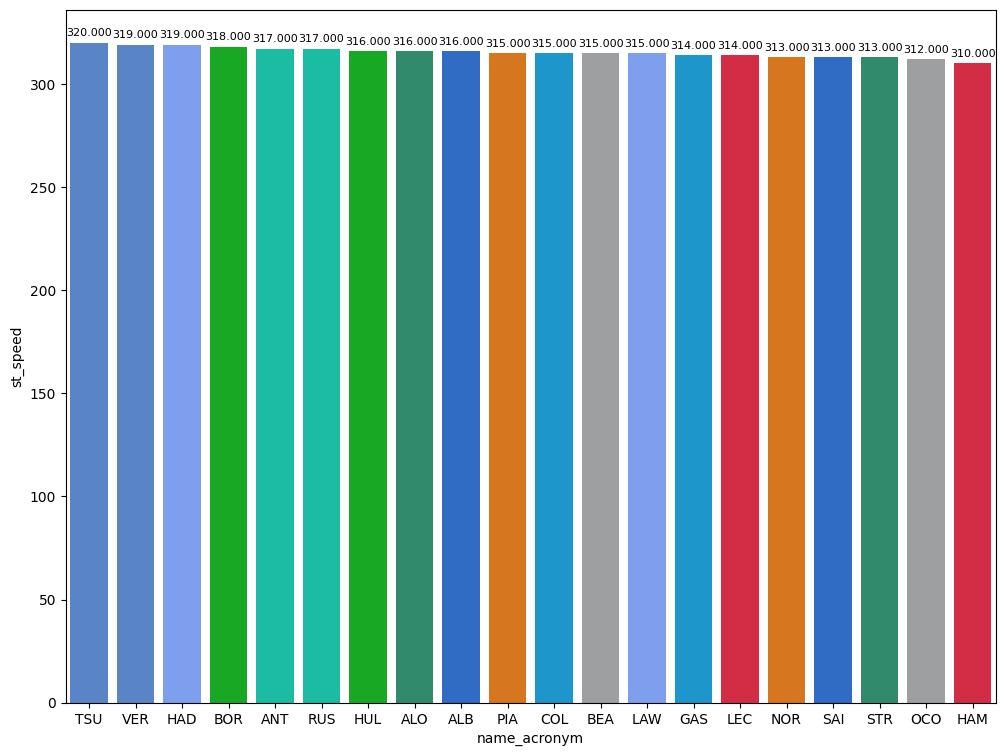

In [25]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

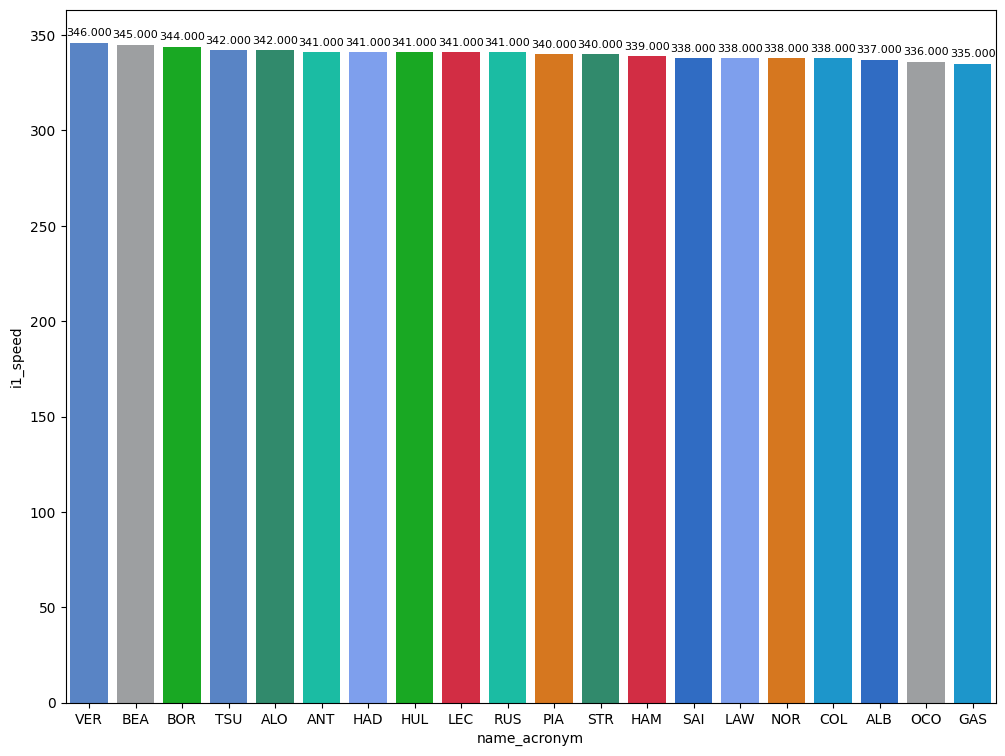

In [26]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

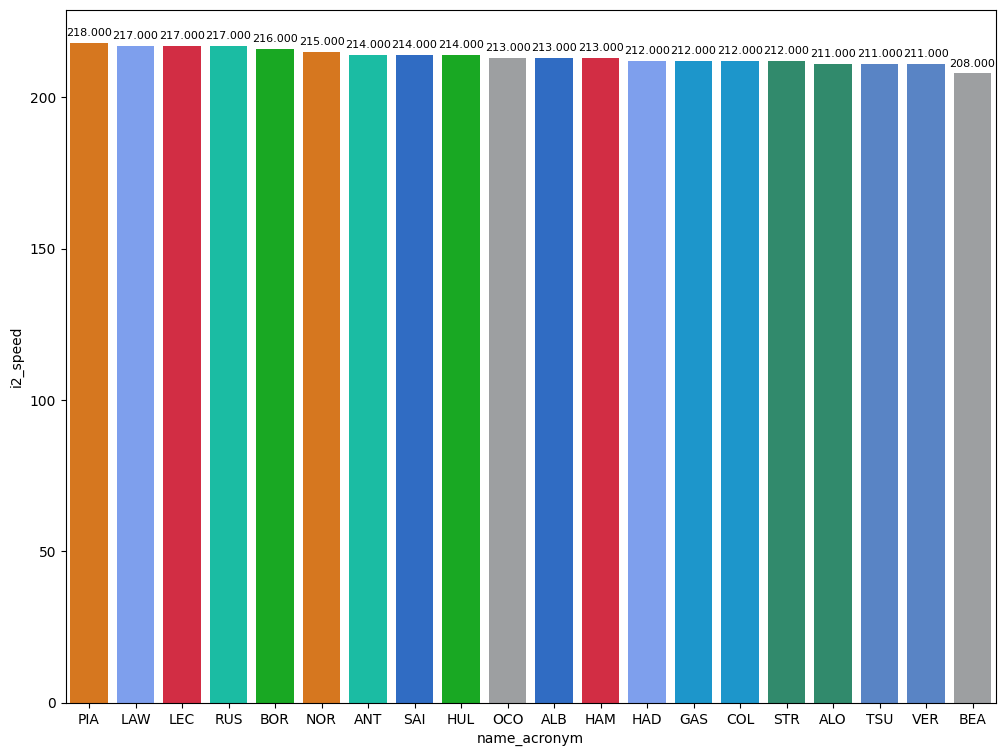

In [27]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [28]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
146,Charles LECLERC,HARD,30.534,45.231,28.383,104.148
355,George RUSSELL,MEDIUM,30.038,44.544,28.016,102.598
393,Oscar PIASTRI,SOFT,30.207,43.604,28.211,102.022


### Deltas
Everyone, except Colapinto, did their fastest lap attemp at the final of the session. BEA had a problem in sector 2 and TSU were unable to improve his fastest attemp.
If it does not rain, McLaren could take advantage of their strong second sector for fighting for pole. Alpine will suffer here due to lack of engine power and entering in Q2 will be very difficult.

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


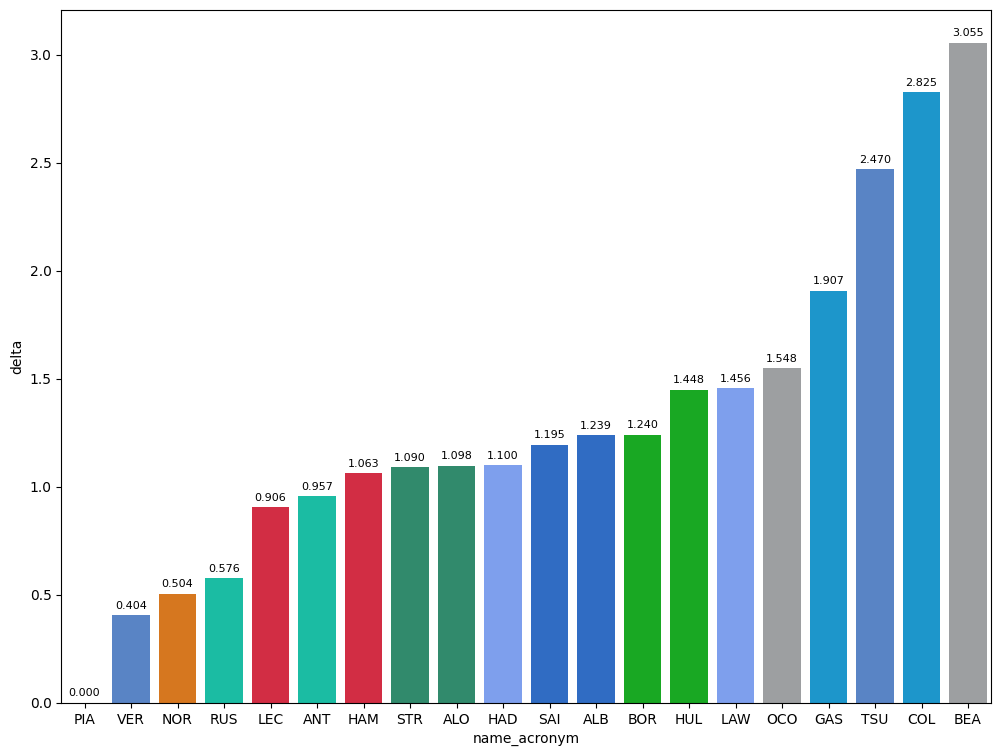

In [30]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
S1: As we watched in Speed Track session, Red Bull is the fastest here. Sauber and Mercedes have to take advantage at maximum this sector because is the strongest for the setup. On the other hand, McLaren and Williams are in the midfield. Setup is crucial because RB with the same engine are the 17th and 19th.
S2: This is the McLaren sector where they dominated. RB and Ferrari stand out in this sector while the teams that standed out in S1 suffer in S2.
S3: This sector is a long straight where teams that standed out in S1 will be in the same situation.

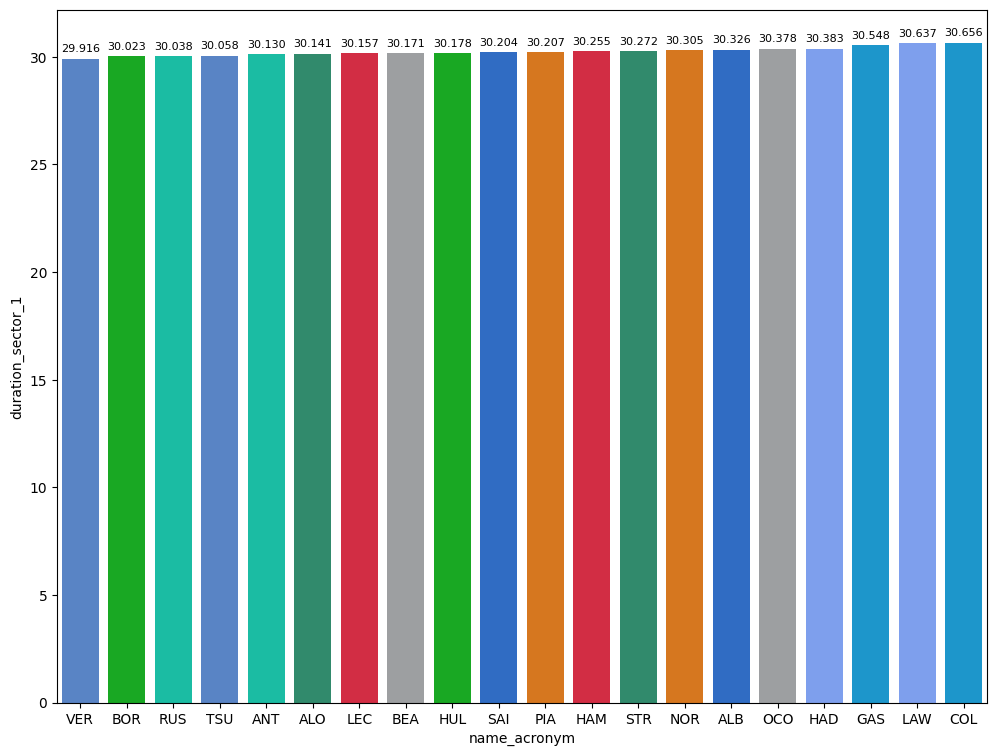

In [31]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

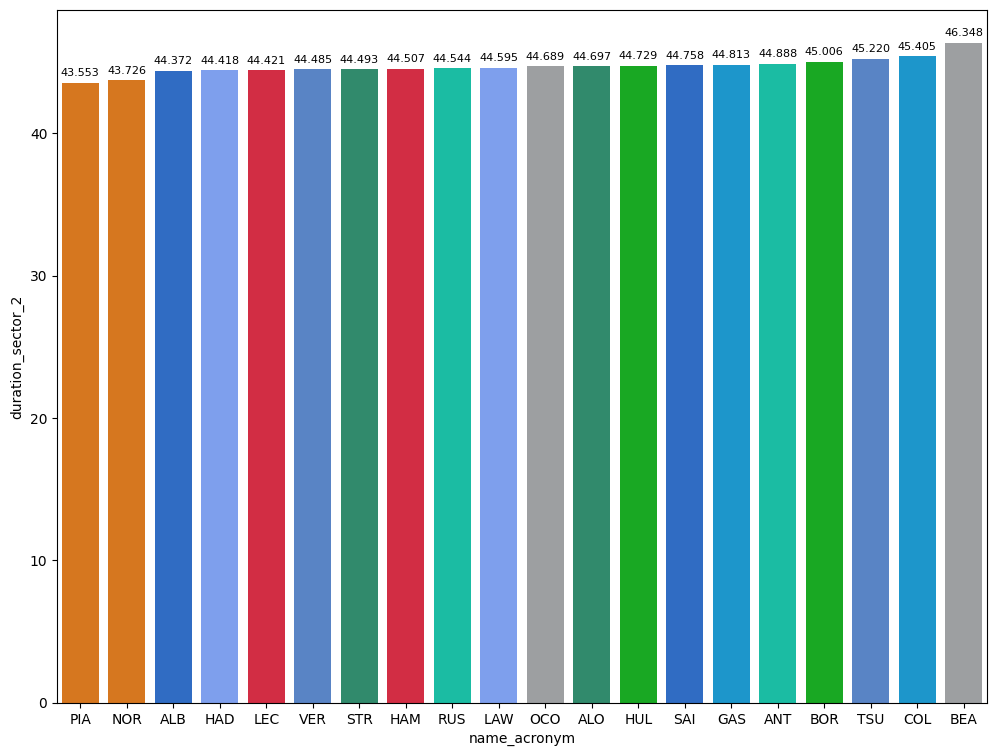

In [32]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

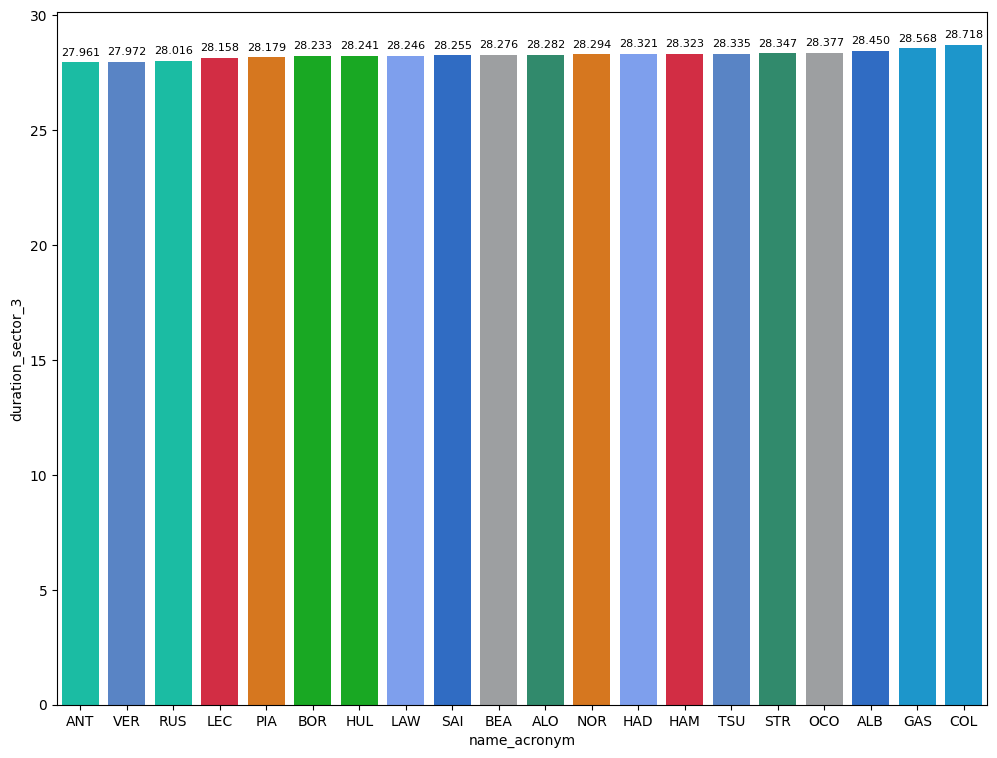

In [33]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [34]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration >108  and lap_duration <=112.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
MEDIUM,108.783643
HARD,109.888304
SOFT,110.058000


## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [101]:
qualy_session = list(libraryDataF1.obtain_information('race_control',session_key=9930).query('message.str.contains("GREEN")').date.str.split())
qualy_session


[['2025-07-25T14:30:00+00:00'],
 ['2025-07-25T14:55:00+00:00'],
 ['2025-07-25T15:18:00+00:00']]

In [67]:
libraryDataF1.obtain_information('race_control',session_key=9930).query('message.str.contains("DELETED")')

,meeting_key,session_key,date,driver_number,lap_number,category,flag,scope,sector,message
2,1265,9930,2025-07-25T14:35:19+00:00,None,None,Other,None,None,NaN,CAR 87 (BEA) TIME 1:42.943 DELETED - TRACK LIM...
4,1265,9930,2025-07-25T14:36:35+00:00,None,None,Other,None,None,NaN,CAR 12 (ANT) TIME 2:04.851 DELETED - TRACK LIM...
16,1265,9930,2025-07-25T14:43:33+00:00,None,None,Other,None,None,NaN,CAR 22 (TSU) TIME 1:42.890 DELETED - TRACK LIM...
38,1265,9930,2025-07-25T15:00:03+00:00,None,None,Other,None,None,NaN,CAR 81 (PIA) TIME 1:41.736 DELETED - TRACK LIM...


### Obtain setup

In [64]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9930)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9930)
drivers = libraryDataF1.obtain_information('drivers',session_key=9930)
libraryDataF1.obtain_drivers_colours(drivers)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted were deleted from dataset in order to obtain only the valid laps for the analysis.

In [68]:
laptimes_deleted = [102.943,124.851,102.890,101.736]
driver_number_lap_deleted = [87,12,22,81]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [69]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

The fastest lap  is 100.510 seconds (1.40.510= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (107.54 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [70]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 107.54")

In [71]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
Hamilton spun at the exit of the chicane spoiling some laps. ALB and HUL had good times but due to the yellow flag they were unable to pass to Q2 and ANT had a problem in his fastest lap damaging his tyres.
SQ2 was a madness with both Aston being knocked-out when in FP they showed a good pace. Incredible performance of OCO and GAS entering in SQ3 thanks to hte track improvement.
Max was able to fight versus McLaren being NOR

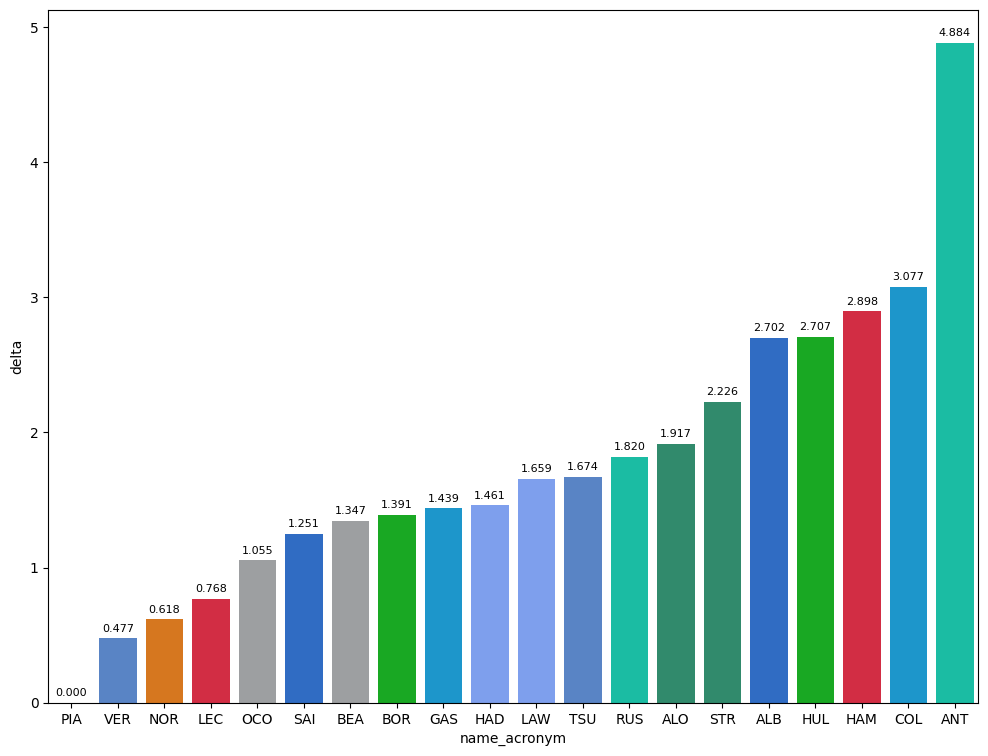

In [72]:
dt = jointables.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

In [81]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [108]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start < '2025-07-25T14:55:00+00:00'"
maximumDateQ2 = "date_start < '2025-07-25T15:18:00+00:00' and date_start >= '2025-07-25T14:55:00+00:00'"
maximumDateQ3 = "date_start > '2025-07-25T15:18:00+00:00'"

### Speed trap
As we watched in FP, Red Bull had a good setup in straights, Aston and Sauber followed the same way. With this setup, you are faster on straights (S1 and S3) but suffer in S2

#### Maximum speed per drivers

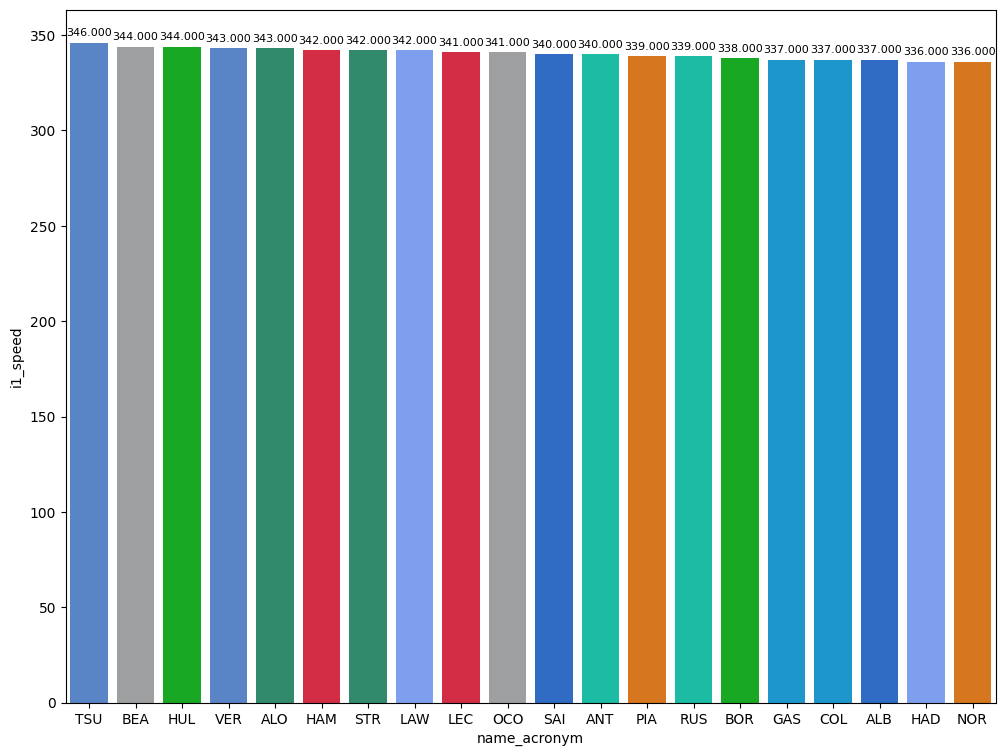

In [86]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

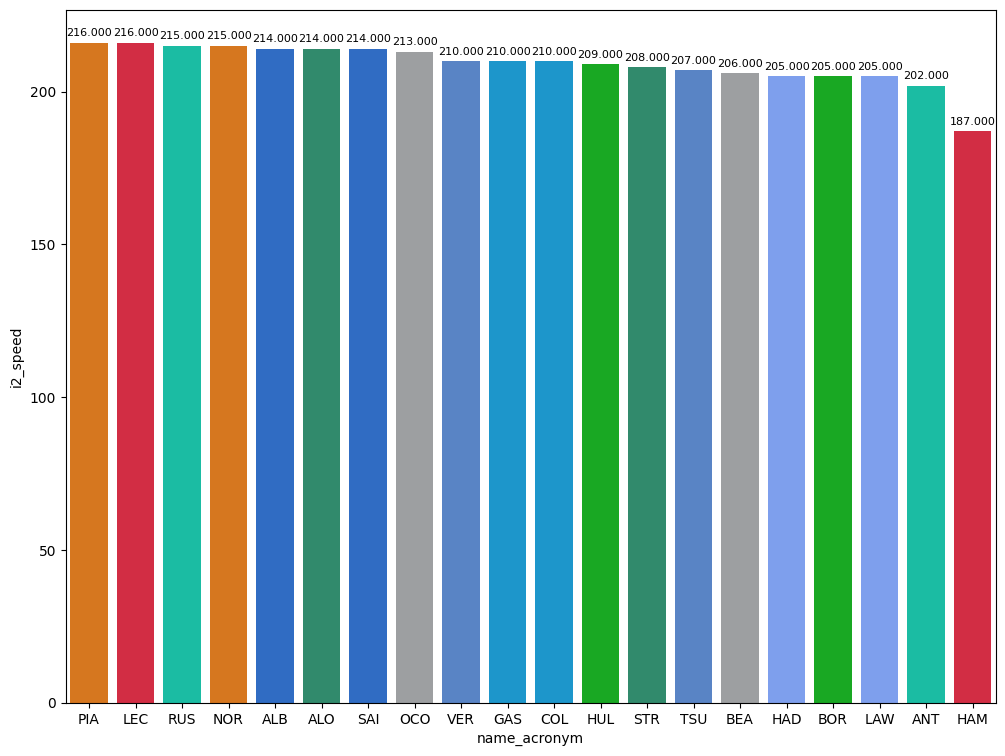

In [87]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

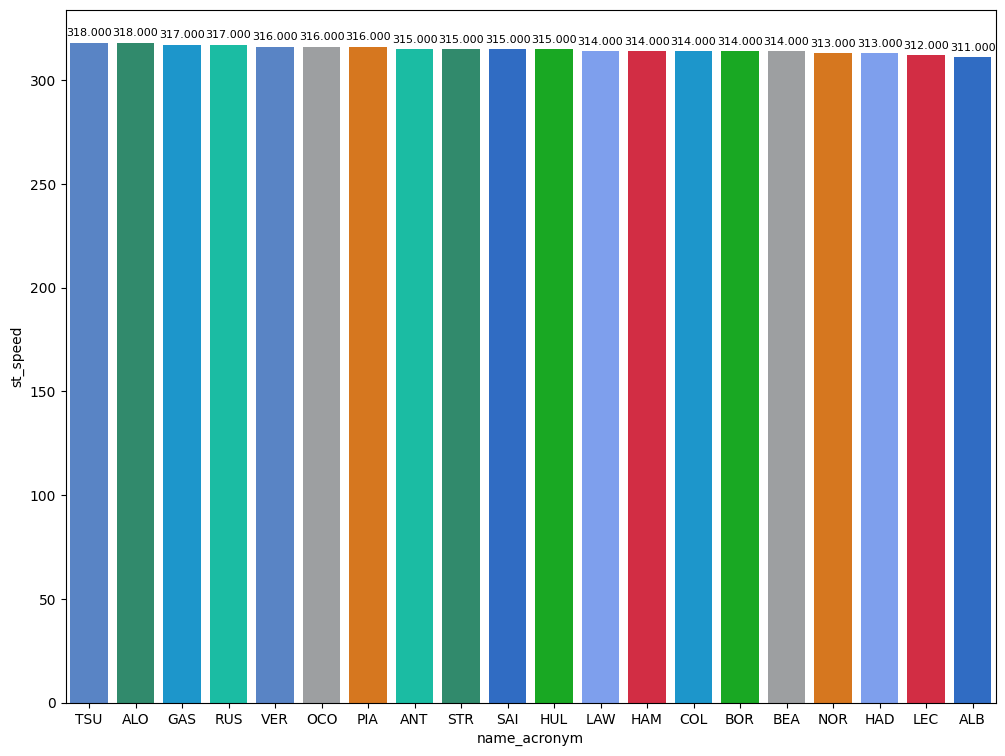

In [88]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Sprint Qualyfing 1

In [109]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Alpine gave Gasly a setup centered on the straights in order to try to compensate lack of power of Reanult engine. This helped him in sector 1 where only Hamilton were faster than Pierre. On the other hand, he suffered a lot in sector 2 being 19th slowest of the session. Thanks to the setup and Hamilton's mistake, he was able to pass to Q2 being the 5th fastest

In [110]:
#Reference
P15 = q1Data[14:15]

In [111]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Pierre GASLY Sector 1:  30.062 Sector 2:  44.908 Sector 3:  28.201


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.

In [112]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,23,0.041,0.258,-0.586,0.369,ALB
1,27,0.046,0.028,-0.206,0.224,HUL
2,44,0.237,-0.042,-0.343,0.622,HAM
3,43,0.416,0.206,-0.153,0.363,COL
4,12,2.223,0.293,1.650,0.280,ANT


In [113]:
#libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [114]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,81,-1.402,0.015,-1.367,-0.050,PIA
1,1,-1.128,-0.036,-1.106,0.014,VER
2,4,-1.103,0.042,-1.162,0.017,NOR
3,14,-0.744,-0.019,-0.568,-0.157,ALO
4,63,-0.521,-0.044,-0.624,0.147,RUS
5,6,-0.460,0.260,-0.783,0.063,HAD
6,18,-0.435,-0.076,-0.361,0.002,STR
7,16,-0.408,0.062,-0.590,0.120,LEC
8,55,-0.395,0.072,-0.677,0.210,SAI
9,5,-0.365,0.032,-0.423,0.026,BOR


#### Best sector per driver

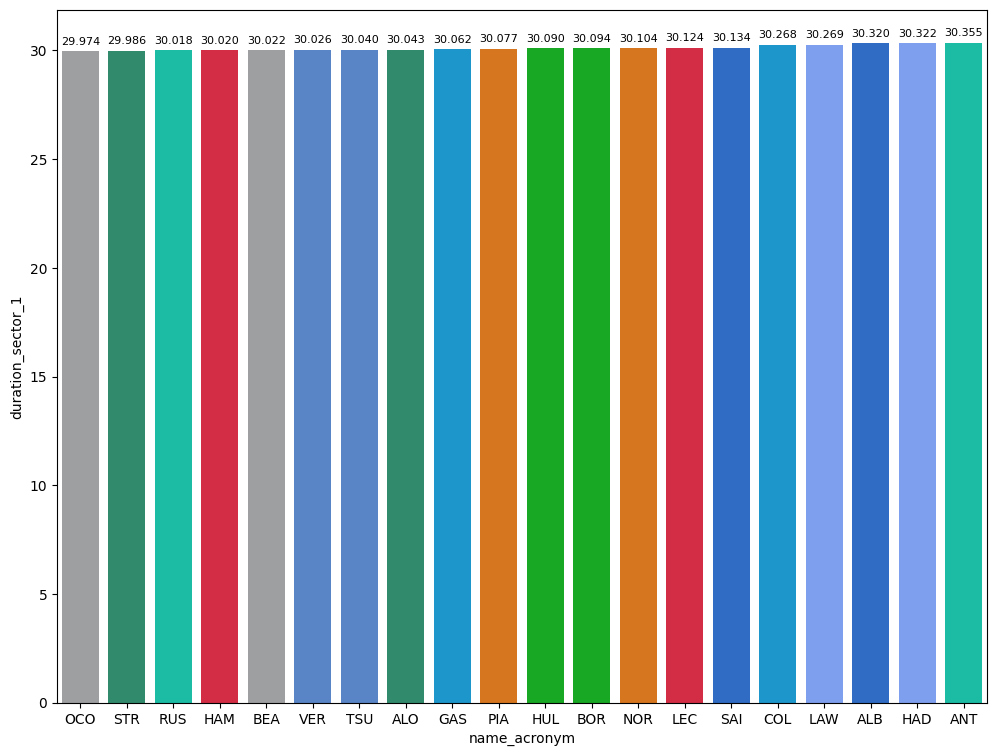

In [115]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

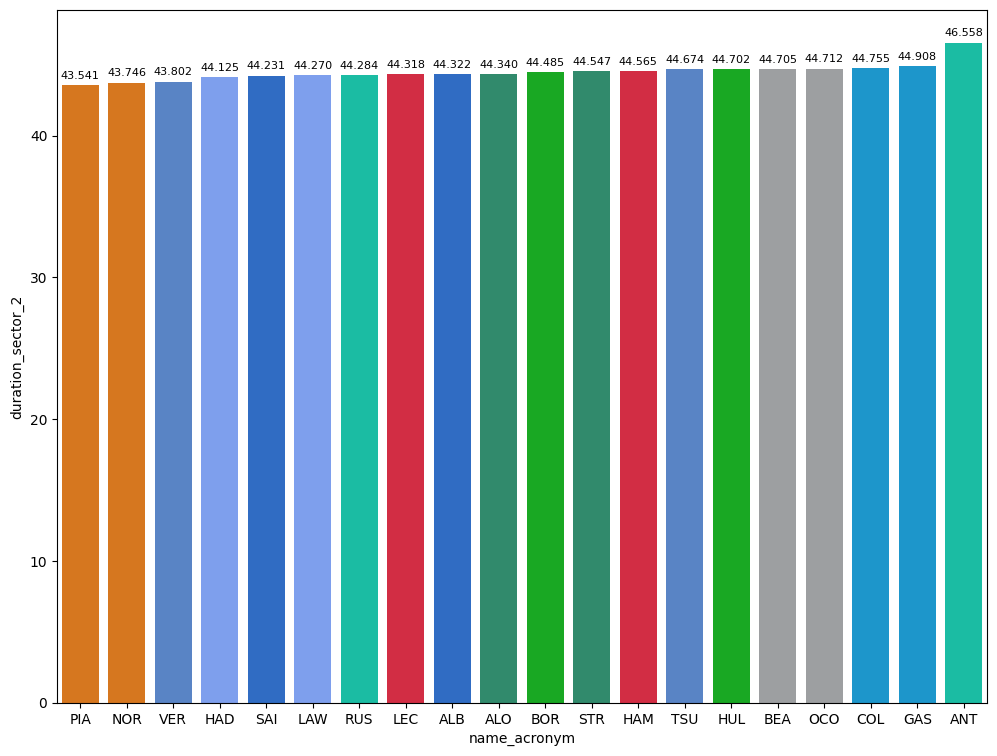

In [116]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

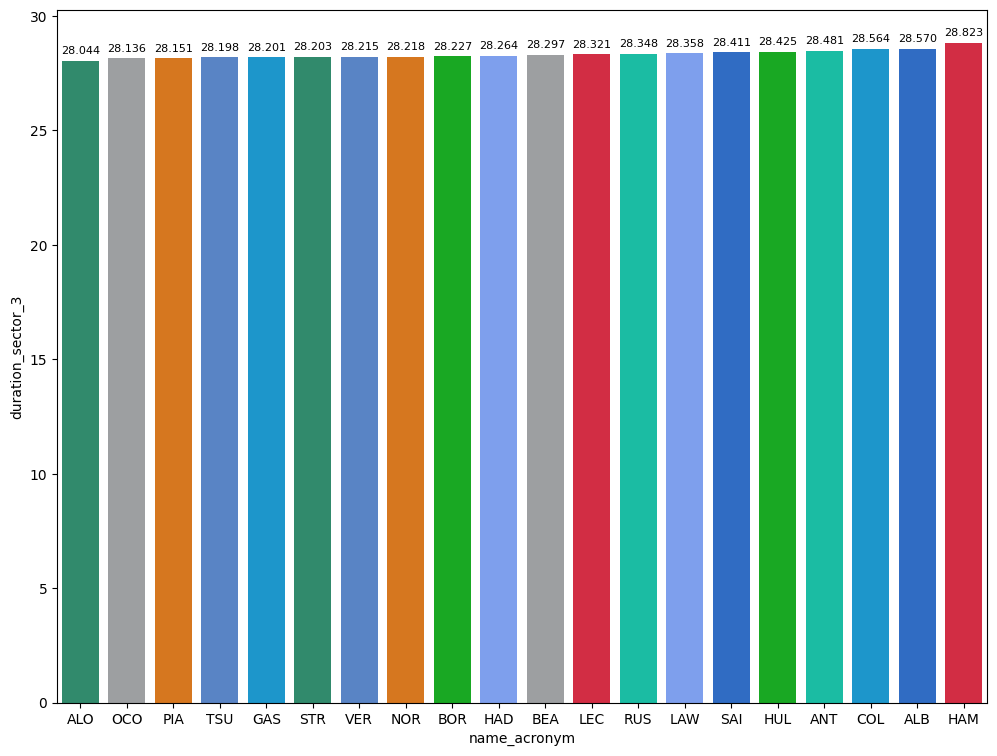

In [117]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [118]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.
Piastri laptime was deleted for tracks limits and this forced him to do a security lap. In this session, his second sector was crucial to pass to Q3. TSU was close to pass but the second sector helps Piastri but in case of LAW, he was going to pass but his sector 1 was 14th slowest and sector being the slowest.

In [119]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  30.076 Sector 2:  43.858 Sector 3:  28.194


In [120]:
#libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

In [121]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,30,0.041,0.166,-0.211,0.086,LAW
1,22,0.056,-0.245,0.369,-0.068,TSU
2,63,0.202,0.090,0.116,-0.004,RUS
3,14,0.325,-0.163,0.485,0.003,ALO
4,18,0.704,0.080,0.613,0.011,STR


##### Analysis with the drivers that finished better than the driver at risk


In [135]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,4,-0.716,-0.001,-0.637,-0.078,NOR
1,1,-0.545,-0.203,-0.211,-0.131,VER
2,16,-0.342,-0.057,-0.145,-0.140,LEC
3,31,-0.327,-0.275,0.050,-0.102,OCO
4,5,-0.227,-0.073,-0.203,0.049,BOR
5,10,-0.179,-0.086,0.081,-0.174,GAS
6,87,-0.109,-0.222,0.185,-0.072,BEA
7,55,-0.077,-0.082,0.033,-0.028,SAI
8,6,-0.040,0.207,-0.274,0.027,HAD


#### Best sector per driver

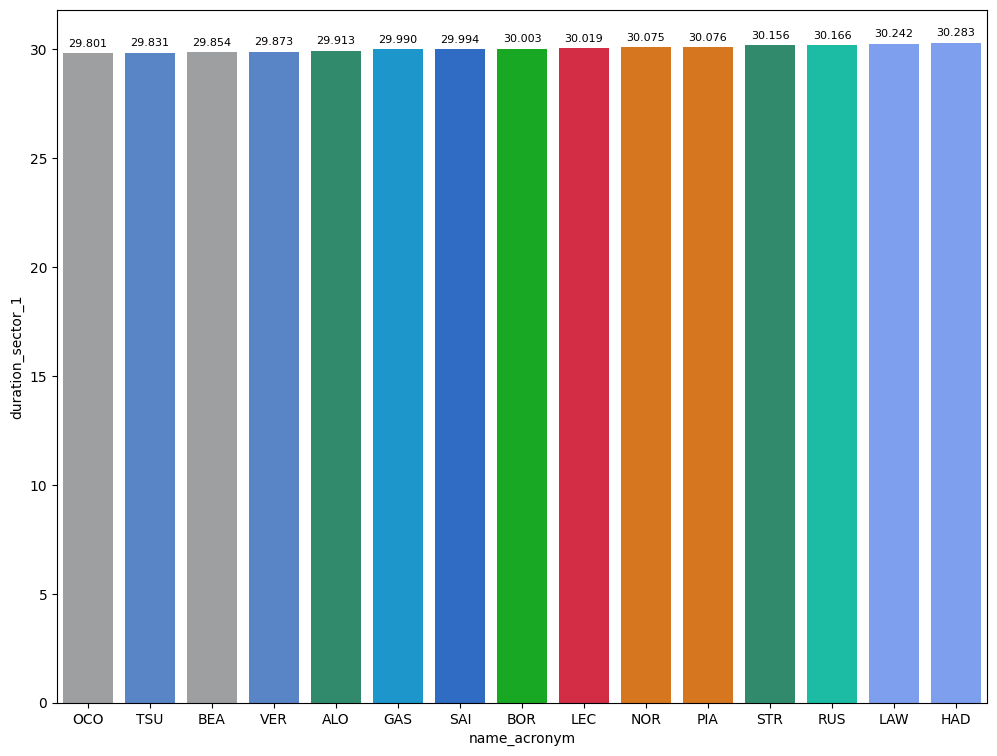

In [122]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

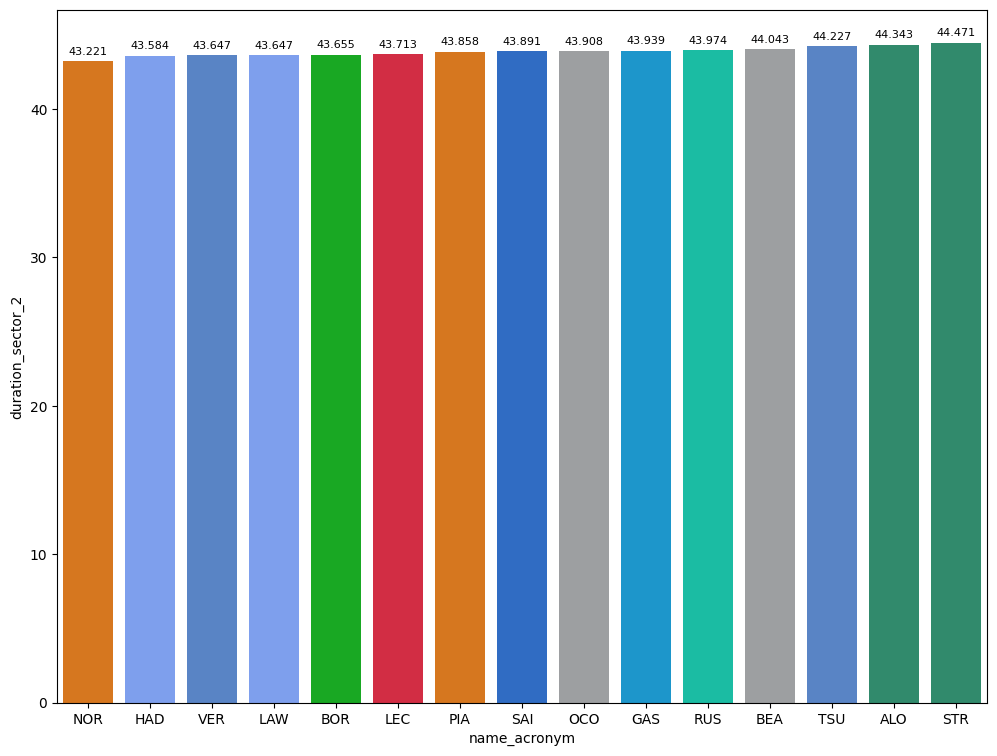

In [123]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

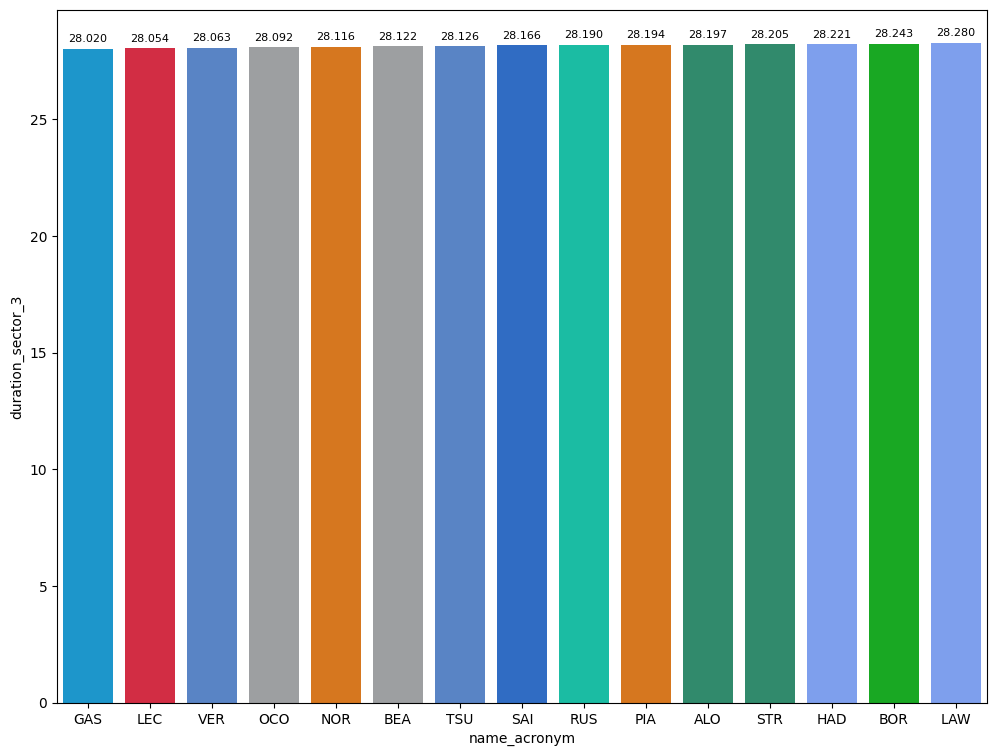

In [124]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [125]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [126]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  29.964 Sector 2:  42.723 Sector 3:  27.823


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.
Piastri forgot his SQ2 and he smashed taking the pole. As we watched in FP, McLaren centered on sector 2 so this is the reason why they are slow in straights. Second sector was crucial were just NOR were able to be 3 tenths behind in this sector. Next driver is VER being 0.45 tenths slower. Lando lost P2 in sector 1 (9th fastest) where he was 2 tenths slower and he almost lost P3 but S2 avoided it.

In [127]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,1,0.477,-0.095,0.447,0.125,VER
1,4,0.618,0.142,0.298,0.178,NOR
2,16,0.768,0.051,0.510,0.207,LEC
3,31,1.055,-0.216,1.131,0.140,OCO
4,55,1.251,0.021,0.853,0.377,SAI
5,87,1.347,-0.162,1.205,0.304,BEA
6,10,1.449,-0.001,1.161,0.289,GAS
7,6,1.461,0.171,0.794,0.496,HAD
8,5,1.666,0.072,1.219,0.375,BOR


#### Best sector per driver

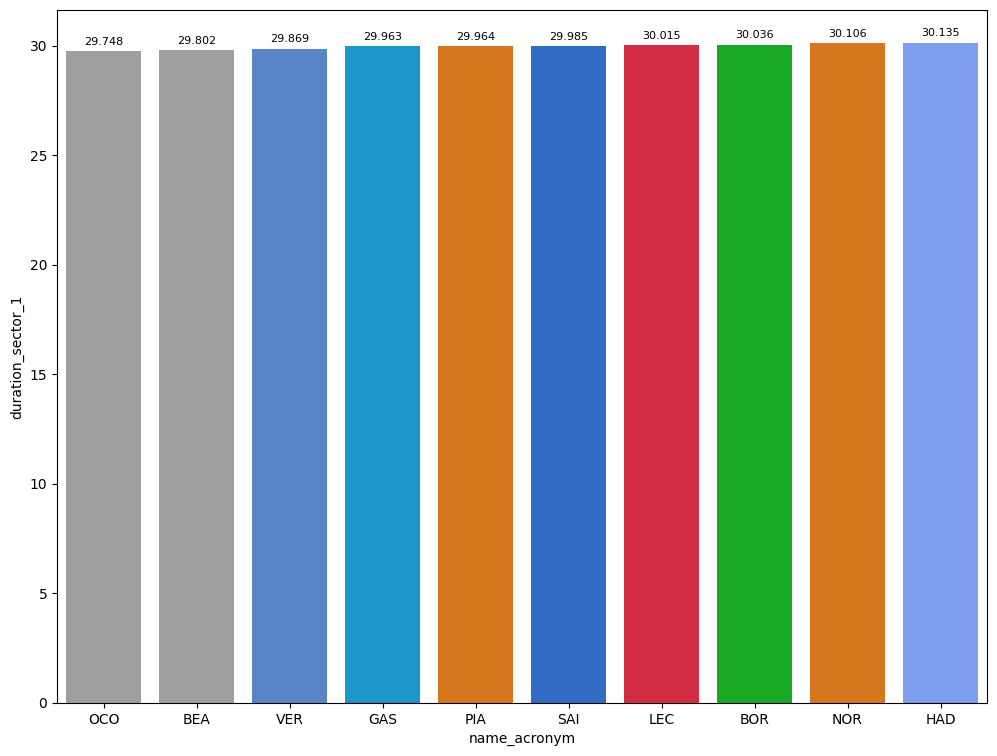

In [128]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

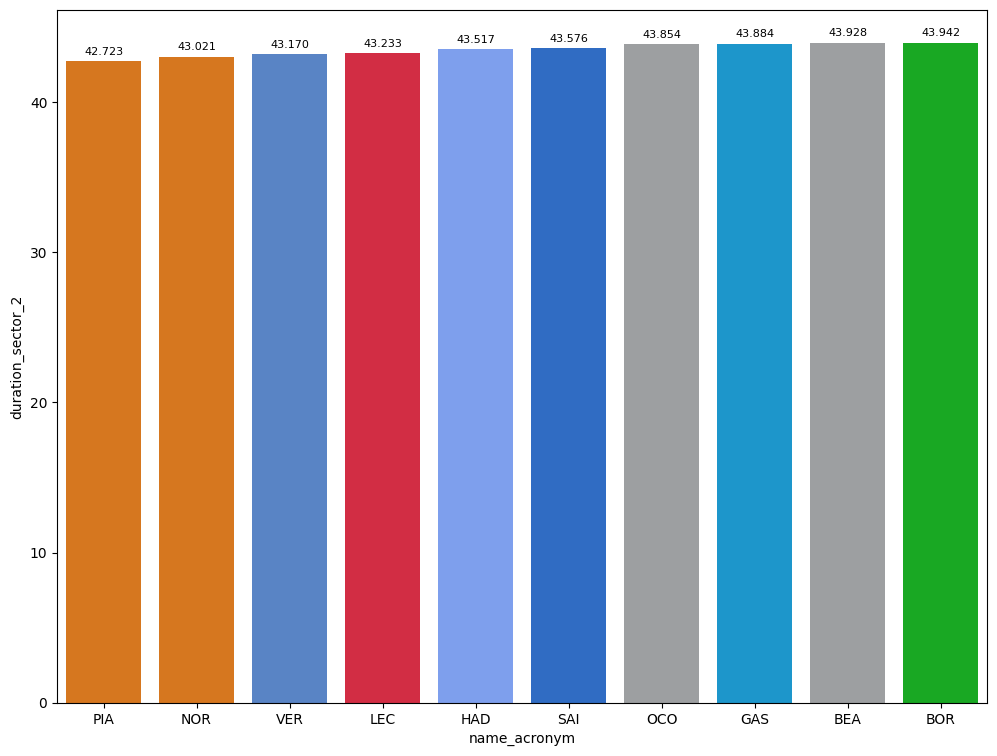

In [129]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

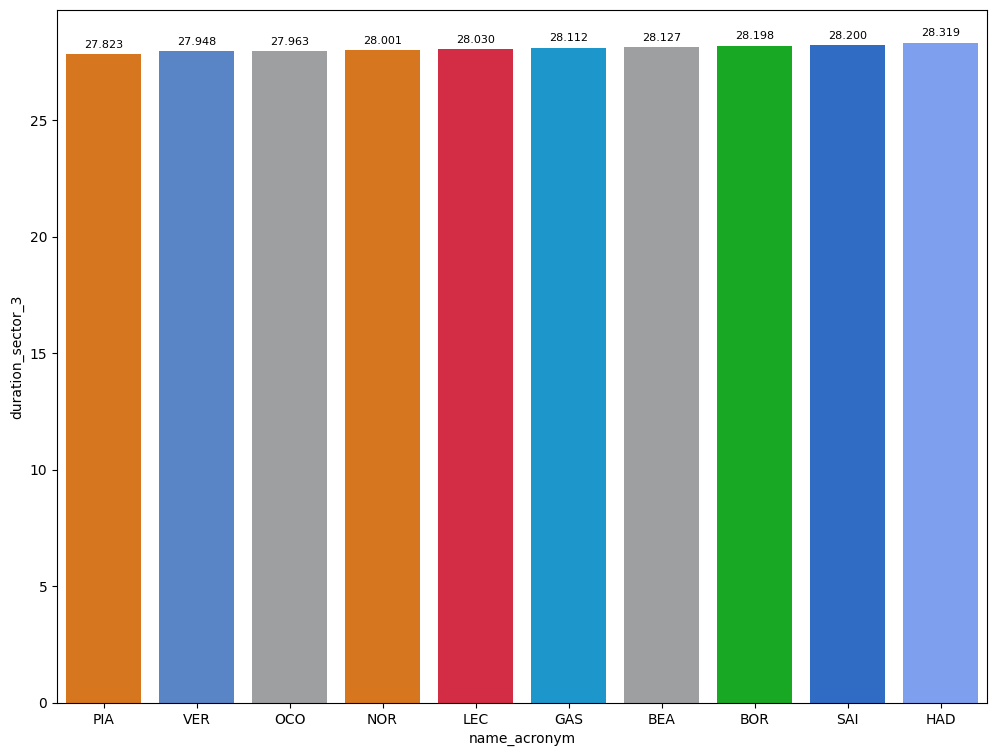

In [130]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

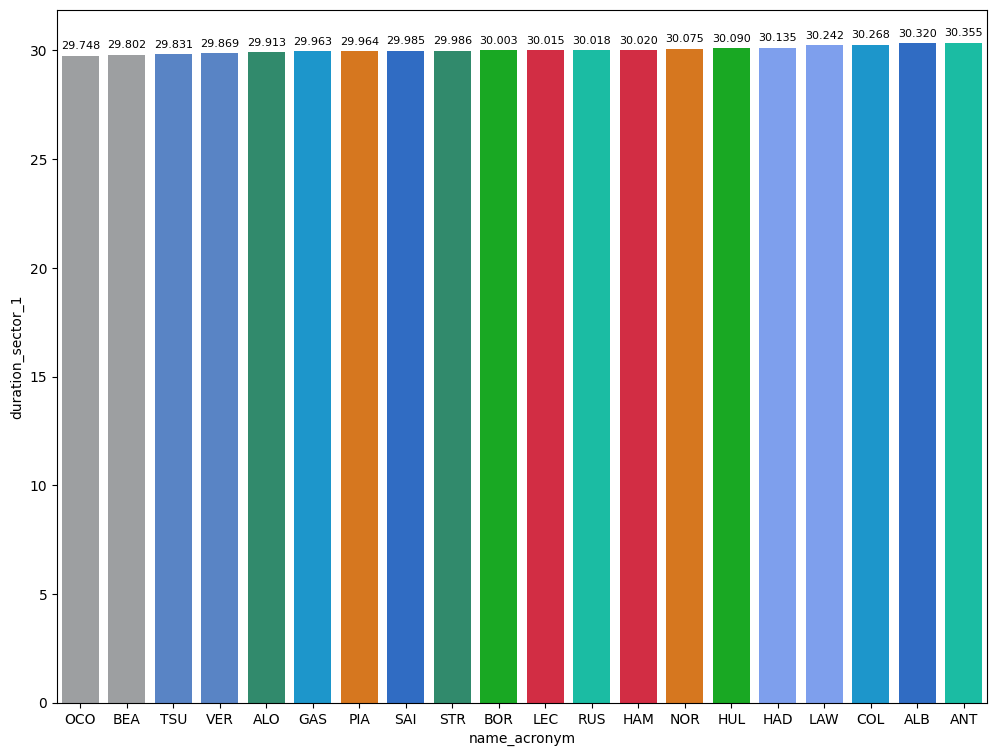

In [131]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

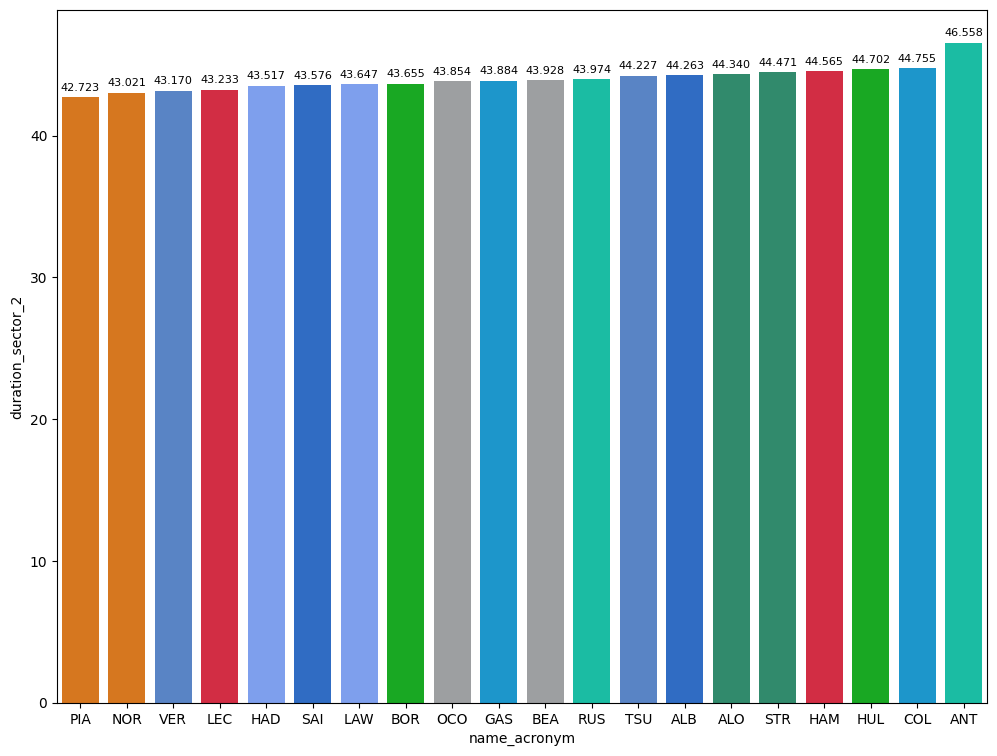

In [132]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

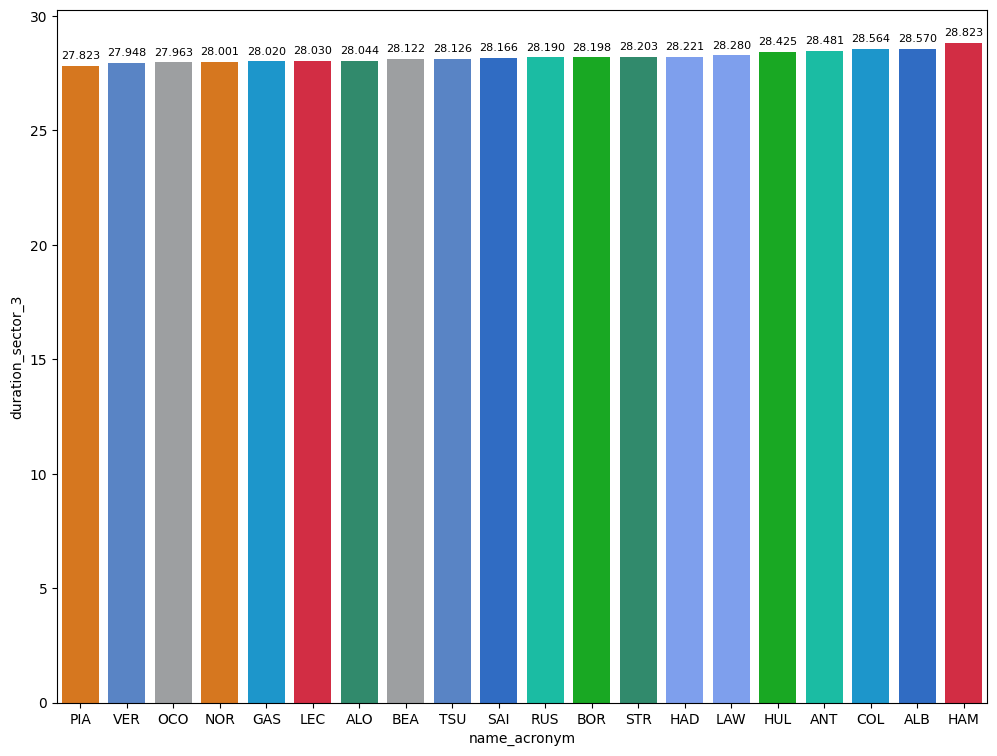

In [133]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9567)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9567)
drivers = libraryDataF1.obtain_information('drivers',session_key=9567)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9568)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9568)
drivers = libraryDataF1.obtain_information('drivers',session_key=9568)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice2],drivers,0.1,0.12,0.1)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,108,111)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Sprint

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9993)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9993)
drivers = libraryDataF1.obtain_information('drivers',session_key=9993)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=101").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=101").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=101").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=101").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 101").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 101").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 101").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 101").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 95
MAXIMUM_SECONDS = 101

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 30')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 12')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 6 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 87 or driver_number == 31')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 7')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 5 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9570)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9570)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9570)
drivers = libraryDataF1.obtain_information('drivers',session_key=9570)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 14, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
# laptimes_deleted = [115.370,96.993,109.924,104.377,102.586,128.082,95.902,102.051]
# driver_number_lap_deleted = [4,63,1,24,22,14,55,23]

# for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
#     try:
#         id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
#         qualyfing = qualyfing.drop(id_deleted)
#     except:
#         print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

Due to changing climate conditions, I will not apply the 107% rule to filter those laps that are within. So, I will choose the fastest laps of the last classified. Zhou was the slowest and the slowest of his fast attemps will be the threshold to filter those valid laps. The new threshold will be 1.57.775(117.775)

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 117.775")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-07-27T14:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-07-27T14:48:00+00:00' and date_start >'2024-07-27T14:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-07-27T14:48:00+00:00'"

### Qualyfing 1
In this session both Hasses were out with Tsunoda,Sargeant and Zhou.

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. Track was soaked even though it was not raining.The new track alphast did not help to dry the track. With these conditions, drivers improved their fastest laps in each attemp. Hence the difference in each sector are big. As we can see in the table referred to the comparaison with the driver eliminated, everybody except Tsunoda was faster than Stroll. In the second sector, Stroll was able to secure his pass to Q2 being 8 tenths faster than Hulkenberg. 


In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
Albon was able to pass Hulkenberg, but, unfortunately, his second sector was bad.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, we did not have any surprise with Checo passing to Q3.

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
As we were able to see in Q1, the second sector was crucial to pass to Q3. In the Checo's case he lost 2 tenths with Albon in the sector 1 and 3 tenths in the third sector but his second sector was enough to pass to Q3 but the gap was very close.3 militenths.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
The sector that was crucial was the second, so that those teams that bet for a specification oriented towards downforce was very important.
Note: All this analysis can be checked in F1 tempo

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9574)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9574)
drivers = libraryDataF1.obtain_information('drivers',session_key=9574)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 94
MAXIMUM_SECONDS = 112.5

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9574)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration